In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [66]:
data = pd.read_csv('Medical cost.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [67]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1332 non-null   float64
 3   children  1331 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [68]:
data.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [69]:
data.isna().sum()

age         9
sex         0
bmi         6
children    7
smoker      0
region      0
charges     0
dtype: int64

In [70]:
data.age = data.age.fillna(data.age.mean())
data.isna().sum()

age         0
sex         0
bmi         6
children    7
smoker      0
region      0
charges     0
dtype: int64

In [71]:
data.bmi = data.bmi.fillna(data.bmi.mean())
data.isna().sum()

age         0
sex         0
bmi         0
children    7
smoker      0
region      0
charges     0
dtype: int64

In [72]:
data.children = data.children.fillna(data.children.mean())
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [74]:
data.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [75]:
data = data.drop_duplicates()
data.duplicated().value_counts()

False    1337
Name: count, dtype: int64

In [76]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.00000,1337.000000,1337.000000
mean,39.261193,30.65485,1.093981,13279.121487
std,13.973305,6.08682,1.201687,12110.359656
min,18.000000,15.96000,0.000000,1121.873900
25%,27.000000,26.31500,0.000000,4746.344000
50%,39.246050,30.40000,1.000000,9386.161300
75%,51.000000,34.60000,2.000000,16657.717450
max,64.000000,53.13000,5.000000,63770.428010


<Axes: xlabel='bmi'>

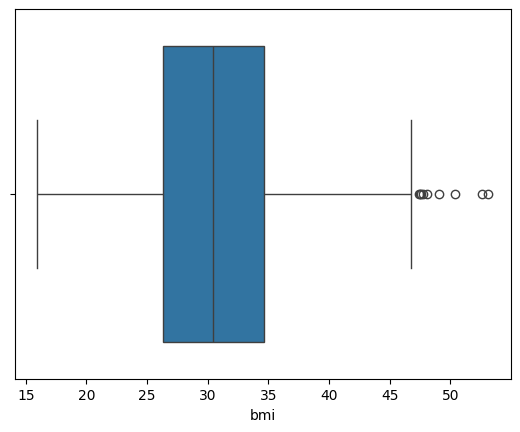

In [77]:
sns.boxplot(x="bmi", data=data)

In [78]:
Q1 = data.bmi.quantile(0.25)
Q3 = data.bmi.quantile(0.75) 
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data.bmi = np.where(data.bmi < lower_bound, lower_bound, data.bmi)
data.bmi = np.where(data.bmi > upper_bound, upper_bound, data.bmi)

<Axes: xlabel='charges', ylabel='bmi'>

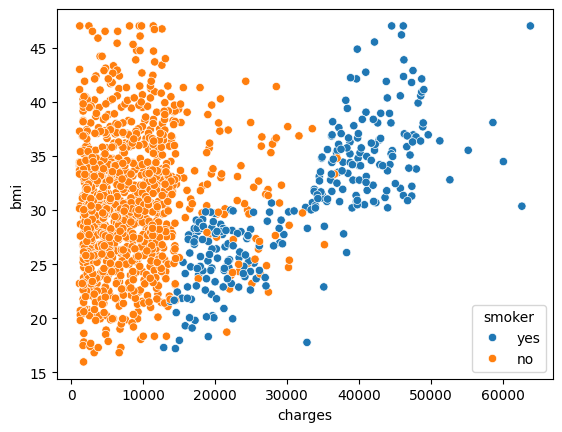

In [79]:
sns.scatterplot(x="charges", y="bmi",hue="smoker", data=data)  

sns.hisplot()

<Axes: xlabel='age', ylabel='Count'>

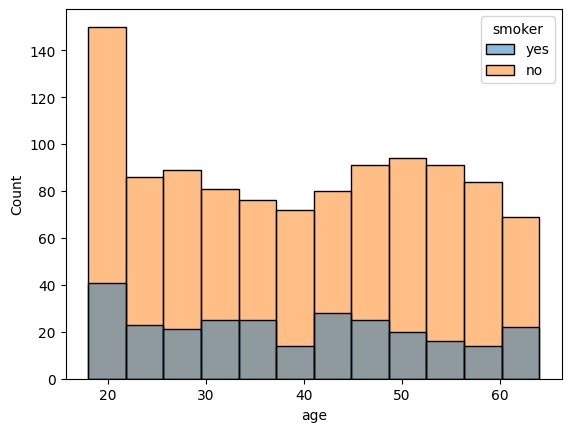

In [80]:
sns.histplot(x='age',hue="smoker", data=data)

In [81]:
data 

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [82]:
from sklearn.preprocessing import LabelEncoder, TargetEncoder 

In [83]:
le=LabelEncoder()
data.sex = le.fit_transform(data.sex)
data.smoker = le.fit_transform(data.smoker)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,southwest,16884.92400
1,18.0,1,33.770,1.0,0,southeast,1725.55230
2,28.0,1,33.000,3.0,0,southeast,4449.46200
3,33.0,1,22.705,0.0,0,northwest,21984.47061
4,32.0,1,28.880,0.0,0,northwest,3866.85520


In [84]:
#14 - Encodage des variables categorielles multi
#Grouper les categories
data.groupby("region").size()
#Calcul de la frequence par categorie e insertion dans le dataframe
fe = data.groupby("region").size()/len(data)
data.loc[:,"region_freq_encode"] = data["region"].map(fe)
data

,age,sex,bmi,children,smoker,region,charges,region_freq_encode
0,19.0,0,27.900,0.0,1,southwest,16884.92400,0.243082
1,18.0,1,33.770,1.0,0,southeast,1725.55230,0.272251
2,28.0,1,33.000,3.0,0,southeast,4449.46200,0.272251
3,33.0,1,22.705,0.0,0,northwest,21984.47061,0.242334
4,32.0,1,28.880,0.0,0,northwest,3866.85520,0.242334
...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,0,northwest,10600.54830,0.242334
1334,18.0,0,31.920,0.0,0,northeast,2205.98080,0.242334
1335,18.0,0,36.850,0.0,0,southeast,1629.83350,0.272251
1336,21.0,0,25.800,0.0,0,southwest,2007.94500,0.243082


In [85]:
data.region_freq_encode[data.region =="northwest"].unique()


array([0.24233358])

In [86]:
data.region_freq_encode[data.region =="southeast"].unique()

array([0.27225131])

In [87]:
data.region_freq_encode[data.region =="northeast"].unique()

array([0.24233358])

In [88]:
data.region_freq_encode[data.region =="southwest"].unique()

array([0.24308153])

In [89]:
data.drop(columns=["region"], inplace=True)
data

,age,sex,bmi,children,smoker,charges,region_freq_encode
0,19.0,0,27.900,0.0,1,16884.92400,0.243082
1,18.0,1,33.770,1.0,0,1725.55230,0.272251
2,28.0,1,33.000,3.0,0,4449.46200,0.272251
3,33.0,1,22.705,0.0,0,21984.47061,0.242334
4,32.0,1,28.880,0.0,0,3866.85520,0.242334
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,0,10600.54830,0.242334
1334,18.0,0,31.920,0.0,0,2205.98080,0.242334
1335,18.0,0,36.850,0.0,0,1629.83350,0.272251
1336,21.0,0,25.800,0.0,0,2007.94500,0.243082


In [91]:
#Sauvegarder en csv
data.to_csv("file.csv",header=True, index=False)